In [1]:
import nibabel as nib
import pandas as pd
import os

In [2]:
base_directory = os.getcwd()
current_directory = os.path.abspath(os.path.join(base_directory, os.pardir))
file_name = "t1_gd.nii.gz"

file_path = os.path.join(
    current_directory,
    "/Users/molinduachintha/Downloads/brainmetshare-3/train/Mets_005/t1_gd.nii.gz",
)

# Check if the file exists at the given path
if os.path.exists(file_path):
    # Open and read the file
    with open(file_path, "r") as file:
        nib_file = nib.load(file_path)
        print("File loaded sucessfully")
else:
    print(f"File does not exist at path: {file_path}")

File loaded sucessfully


In [3]:
header = nib_file.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3 256 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1.     0.9375 0.9375 1.     1.     1.     1.     1.    ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y   

In [4]:
# Downsample the slices by selecting every 5th slice
downsampled_data = nib_file.slicer[::5, :, :]

In [6]:
output_path = os.path.join(current_directory, f"../Sample Data/downsampled_and_without_rotations_{file_name}")
nib.save(downsampled_data, output_path)

In [7]:
downsampled_file = nib.load(output_path)

In [8]:
downsampled_header = downsampled_data.header
print(downsampled_header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : np.bytes_(b'')
db_name         : np.bytes_(b'')
extents         : 0
session_error   : 0
regular         : np.bytes_(b'')
dim_info        : 0
dim             : [  3  52 256 150   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 5. 1. 1. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : np.bytes_(b'')
aux_file        : np.bytes_(b'')
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 0.0
qoffset_y       : 0.0
qoffset_z       : 0.0


In [9]:
header_df = pd.DataFrame(
    {
        "Header Field": header.keys(),
        "Original Header": header.values(),
        "Downsampled Header": downsampled_header.values(),
    }
)

In [21]:
file_name

't1_gd.nii.gz'

In [23]:
header_df.to_csv(
    f"../../results/After removing rotations and inccorect affine matrix of downsampled data/original_vs_sampled_header_params_{file_name}.csv",
    index=False,
)
header_df.to_excel(
    f"../../results/After removing rotations and inccorect affine matrix of downsampled data/original_vs_sampled_header_params_{file_name}.xlsx",
    index=False,
)

header_df

,Header Field,Original Header,Downsampled Header
0,sizeof_hdr,348,348
1,data_type,np.bytes_(b''),np.bytes_(b'')
2,db_name,np.bytes_(b''),np.bytes_(b'')
3,extents,0,0
4,session_error,0,0
5,regular,np.bytes_(b''),np.bytes_(b'')
6,dim_info,0,0
7,dim,"[3, 256, 256, 150, 1, 1, 1, 1]","[3, 52, 256, 150, 1, 1, 1, 1]"
8,intent_p1,0.0,0.0
9,intent_p2,0.0,0.0


In [11]:
import matplotlib.pyplot as plt

In [12]:
def show_slices(slices):
    """Function to display row of image slices"""
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for original image')

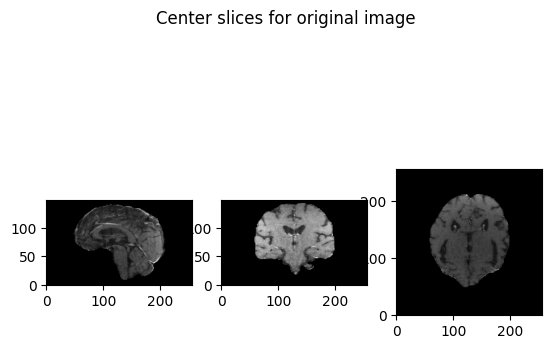

In [13]:
original_shape = nib_file.shape
nib_data = nib_file.get_fdata()
slice_0 = nib_data[original_shape[0] // 2, :, :]
slice_1 = nib_data[:, original_shape[1] // 2, :]
slice_2 = nib_data[:, :, original_shape[2] // 2]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for original image")

Text(0.5, 0.98, 'Center slices for sampled image')

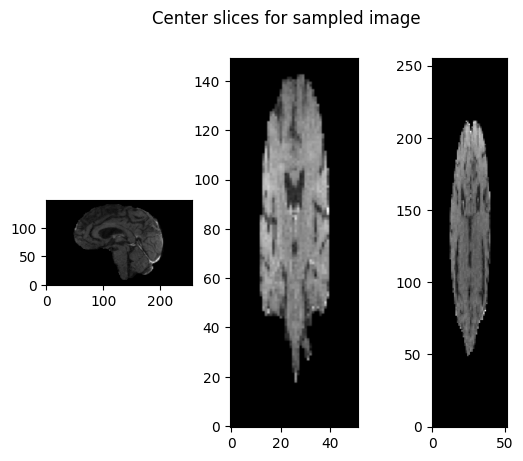

In [14]:
sampled_shape = downsampled_data.shape
sampled_data = downsampled_data.get_fdata()
slice_0 = sampled_data[sampled_shape[0] // 2, :, :]
slice_1 = sampled_data[:, sampled_shape[1] // 2, :]
slice_2 = sampled_data[:, :, sampled_shape[2] // 2]
show_slices([slice_0, slice_1, slice_2])

plt.suptitle("Center slices for sampled image")